# MapOnTap: clustering touchscreen interaction to understand map apps usage around home location.


Introduction to Data Science for Doctoral Student | DSI Excellence Program | HS 22
PhD Student: Zingaro Donatella | ID No. 21-738-455

# Part I - Data Cleaning and Preprocessing

This Jupyter Notebook focuses on the Data cleaning and preparation. 

In [247]:
# Import Packages for functions needed to preprocess the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
from ast import literal_eval
%matplotlib inline
import itertools
import ast
import scipy
from scipy import stats
from geopy.distance import distance

First, the  3 csv files containing ananymised smartphone data of 53 participants are read as pandas dataframe.
1. File mot_2_public_TapDataParsed.csv is structured as a table where each row constitutes the single phone session of the user. A phone session starts when the user is unlocking the phone and then finishes when the user locks the phone again. 
2. File mot_2_public_DeviceApplication.csv, contains the information related to the device used by participants as well as applications and categories.
3. File mot_2_publicGeoLocationData.csv this table contains gps data that have been recorded from user when they granted the positioning of the app.


In [248]:
# Read CSV files 
data_folder = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data')
# Touchscreen Interaction counter
tap_data = pd.read_csv(data_folder / "mot_2_public_TapDataParsed.csv", index_col=None, header=0)
# Application and Category used
app_data = pd.read_csv(data_folder / "mot_2_public_DeviceApplication.csv", index_col=None, header=0)
# GPS location data
gps_data = pd.read_csv(data_folder / "mot_2_public_GeoLocationData.csv", index_col=None, header=0)
#final_data  = pd.read_csv(data_folder / "exploded_dataset.csv", index_col=None, header=0)

In [44]:
# Uncomment the two code below and use it when you want to understand, change your path to upload your file.
#print(f"Current directory: {Path.cwd()}")
#print(f"Home directory: {Path.home()}")

Second, clean the app dataset. Some applications are not needed. For example, we do not need the information related to 'quantactions' which is the application used to access the tap (touchscreen interaction) counter and 'mapontap', which is the application used by the user registering the GPS data. This application has been categorised as maps and navigation. However, they are not informative on the analysis level of map usage, but rather to access, deny, and allow checking GPS location (users can do that anytime). At the same time, we get rid of the launcher apps. A launcher is essentially the app that displays the home screen, widgets, app drawer, etc. Different operating systems have different launchers because they are built-in apps and are not informative on users' smartphone usage.

In [45]:
# Uncomment to see the two applications 
#app_data[(app_data['application'].str.contains('mapontap'))]
#app_data[(app_data['application'].str.contains('quantactions'))]

In [249]:
# In app_data remove rows that contain application which are not relevant for our study. After index is reset
cleaned_app_dataset = app_data[(app_data['application'].str.contains('quantactions')) | (app_data['application'].str.contains('mapontap'))| (app_data['application'].str.contains('launcher')) == False ]
cleaned_app_dataset = cleaned_app_dataset.reset_index()
cleaned_app_dataset

,index,#,application,applicationId,tapDeviceId,category,partId
0,2,3,com.android.settings,3,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,-1,138e1d8ba31720814222a815d02dffdfb6b928eb
1,3,4,org.telegram.messenger,4,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,COMMUNICATION,138e1d8ba31720814222a815d02dffdfb6b928eb
2,4,5,com.spotify.music,5,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,MUSIC_AND_AUDIO,138e1d8ba31720814222a815d02dffdfb6b928eb
3,5,6,com.igg.android.lordsmobile,6,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,GAME,138e1d8ba31720814222a815d02dffdfb6b928eb
4,6,7,android,9,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,-1,138e1d8ba31720814222a815d02dffdfb6b928eb
...,...,...,...,...,...,...,...
4987,5160,5161,com.cronto.crontosign.swiss,87,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,FINANCE,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
4988,5161,5162,com.sec.android.app.samsungapps,88,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,-1,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
4989,5162,5163,com.sec.android.app.voicenote,89,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,TOOLS,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
4990,5163,5164,com.google.android.videos,90,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,VIDEO_PLAYERS,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb


In [196]:
# Check in the cleaned app dataset the unique categories from Google PLayStore that have been found.
cleaned_app_dataset['category'].unique()

array(['-1', 'COMMUNICATION', 'MUSIC_AND_AUDIO', 'GAME', 'FINANCE',
       'TOOLS', 'SHOPPING', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS',
       'PRODUCTIVITY', 'ENTERTAINMENT', 'HEALTH_AND_FITNESS', 'LIFESTYLE',
       'SOCIAL', 'NEWS_AND_MAGAZINES', 'BUSINESS', 'MAPS_AND_NAVIGATION',
       'PHOTOGRAPHY', 'FOOD_AND_DRINK', 'SPORTS', 'WEATHER',
       'AUTO_AND_VEHICLES', 'EDUCATION', 'LIBRARIES_AND_DEMO',
       'BOOKS_AND_REFERENCE', 'MEDICAL', 'DATING', 'PARENTING', 'COMICS',
       'PERSONALIZATION', 'EVENTS', 'HOUSE_AND_HOME', 'ART_AND_DESIGN'],
      dtype=object)

In [197]:
# Check the number of these categories.
len(cleaned_app_dataset['category'].unique())

33

Remove Wiko phone which is our testing smartphone for mapontap groundtruth

In [50]:
#Participant Corrisponding to Wiko phone for MapOnTap : '138e6a7387cb6d5e42e6a3c025c5b346a56f28eb'
cleaned_app_dataset = cleaned_app_dataset[(cleaned_app_dataset['partId'].str.contains('138e6a7387cb6d5e42e6a3c025c5b346a56f28eb'))== False]

In [53]:
cleaned_app_dataset

,application,applicationId,tapDeviceId,category,partId
0,com.android.settings,3,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,-1,138e1d8ba31720814222a815d02dffdfb6b928eb
1,org.telegram.messenger,4,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,COMMUNICATION,138e1d8ba31720814222a815d02dffdfb6b928eb
2,com.spotify.music,5,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,MUSIC_AND_AUDIO,138e1d8ba31720814222a815d02dffdfb6b928eb
3,com.igg.android.lordsmobile,6,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,GAME,138e1d8ba31720814222a815d02dffdfb6b928eb
4,android,9,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,-1,138e1d8ba31720814222a815d02dffdfb6b928eb
...,...,...,...,...,...
4987,com.cronto.crontosign.swiss,87,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,FINANCE,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
4988,com.sec.android.app.samsungapps,88,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,-1,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
4989,com.sec.android.app.voicenote,89,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,TOOLS,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
4990,com.google.android.videos,90,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,VIDEO_PLAYERS,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb


In [250]:
#Participant Corrisponding to Wiko phone for MapOnTap : '138e6a7387cb6d5e42e6a3c025c5b346a56f28eb'
tap_data_clean = tap_data[(tap_data['partId'].str.contains('138e6a7387cb6d5e42e6a3c025c5b346a56f28eb'))== False]
tap_data_clean

,#,id,taps,start,stop,orientations,appIds0,timeZone,tapsSession,lengthSession,tapDeviceId,partId
0,1,cc5a58a0-a3e6-11ea-9adf-adbbe39a38de,"[1562589623258, 1562589623884, 1562589624999, ...",1.562590e+12,1.562590e+12,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",GMT+1:0,75,483653,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,138e1d8ba31720814222a815d02dffdfb6b928eb
1,2,cc5a58a1-a3e6-11ea-9adf-adbbe39a38de,"[1562590336968, 1562590369090, 1562590379742, ...",1.562590e+12,1.562590e+12,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",GMT+1:0,100,73385,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,138e1d8ba31720814222a815d02dffdfb6b928eb
2,3,cc5a7fb0-a3e6-11ea-9adf-adbbe39a38de,"[1562590564458, 1562590565102, 1562590565470, ...",1.562591e+12,1.562591e+12,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]",GMT+1:0,16,11521,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,138e1d8ba31720814222a815d02dffdfb6b928eb
3,4,cc5a7fb1-a3e6-11ea-9adf-adbbe39a38de,"[1562590592212, 1562590592787, 1562590593264, ...",1.562591e+12,1.562591e+12,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]",GMT+1:0,11,6645,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,138e1d8ba31720814222a815d02dffdfb6b928eb
4,5,cc5aa6c0-a3e6-11ea-9adf-adbbe39a38de,"[1562590818806, 1562590827422, 1562590828313, ...",1.562591e+12,1.562591e+12,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",GMT+1:0,44,30756,3b925c3f-2706-4178-a0f3-8dd0fcde8f38,138e1d8ba31720814222a815d02dffdfb6b928eb
...,...,...,...,...,...,...,...,...,...,...,...,...
409949,409950,1688c990-9fab-11ec-9bcf-13d78ec6b108,[],1.646829e+12,1.646829e+12,[],[],Europe/Zurich,0,0,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
409950,409951,1688f0a0-9fab-11ec-9bcf-13d78ec6b108,[1646829104358],1.646829e+12,1.646829e+12,[1],[20],Europe/Zurich,1,0,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
409951,409952,168965d0-9fab-11ec-9bcf-13d78ec6b108,"[1646829731638, 1646829733163, 1646829737895, ...",1.646830e+12,1.646830e+12,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5, 4, 4, 4, 20, 20, 20, 20, 20, 20, 20]",Europe/Zurich,11,27655,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb
409952,409953,1689b3f0-9fab-11ec-9bcf-13d78ec6b108,[],1.646830e+12,1.646830e+12,[],[],Europe/Zurich,0,0,89fa4dd7-1ec0-4b69-84b5-afbb6ac5cb62,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb


In [54]:
# Drop columns which creates when resetting index.
#cleaned_app_dataset.drop(columns = {'index','#'}, inplace = True)

In [55]:
# 1292 unique applications have been regitered in the whole dataset for all participants.
len(cleaned_app_dataset['application'].unique())

1286

Third, since the focus of our analysis is based on map  or travel and local categories, this part is exploring which  and hom many unique apps are found in these categories. 
According to Google Play Store: Maps and navigation category includes Navigation tools, GPS, mapping, transit tools, public transportation.
Travel and Local includes: Trip booking tools, ride-sharing, taxis, city guides, local business information, trip management tools, tour booking



MAPS AND NAVIGATION  36 UNIQUE APPLICATIONS registered for all participants

'ch.sbb.mobile.android.b2c', 'com.ubercab', 'jp.co.jreast.en',
'com.apptastic.tokyometromap', 'com.lynxspa.prontotreno',
'ch.uzh.geo.mapontap', 'me.lyft.android',
'com.mapfactor.navigator', 'com.waze', 'com.iAgentur.tcs',
'de.hafas.android.vbz', 'com.sygic.aura', 'org.bikecityguide',
'com.toursprung.bikemap', 'it.nordcom.app', 'ch.mnc.zvv.oneapp',
'ch.admin.swisstopo', 'de.swm.mvgfahrinfo.muenchen',
'com.fairtiq.android', 'com.thetrainline', 'com.atos.spain.th',
'ch.futurecom.zoozurich', 'ch.sbb.mobile.android.preview',
'org.eurail.railplanner', 'com.wikiloc.wikilocandroid',
'de.eos.uptrade.android.fahrinfo.berlin', 'mnc.android.zvvticket',
'com.here.app.maps', 'de.infas.mobico',
'ch.mobility.mobidroid.main', 'ch.carvelo2go.app', 'com.tranzmate',
'com.Avenza', 'com.wemlin.android', 'ch.parkingcard.customer',
'com.huawei.maps.app'

In [10]:
# Explore the maps and Navigation category 
maps_nav_unique = app_data[(app_data['category'].str.contains('MAPS_AND_NAVIGATION'))]
maps_nav_unique['application'].unique()
len(maps_nav_unique['application'].unique())

36

In [11]:
trav_loc_unique =  app_data[(app_data['category'].str.contains('TRAVEL_AND_LOCAL'))]
trav_loc_unique['application'].unique()
len(trav_loc_unique['application'].unique())

75

TRAVEL AND LOCAL UNIQUE APPLICATION

       'com.google.android.apps.maps', 'io.walletpasses.android',
       'de.hafas.android.zvv', 'de.flixbus.app', 'com.goflash.consumer',
       'com.alitalia.mobile', 'ch.liip.timeforcoffee', 'ch.publibike.app',
       'com.emirates.ek.android', 'com.tripadvisor.tripadvisor',
       'com.booking', 'com.mttnow.droid.easyjet', 'ch.sharoo.android',
       'com.airbnb.android', 'com.yoc.swiss.swiss', 'dk.dsb.nda.android',
       'com.aircanada', 'com.delta.mobile.android',
       'net.skyscanner.android.main', 'com.ba.mobile', 'com.limebike',
       'com.plannet.milesandmoreapp', 'com.hostelworld.app',
       'co.bird.android', 'com.mapswithme.maps.pro', 'com.ado.generica',
       'com.bonfire.matterhorn', 'com.flightradar24free',
       'de.bmw.connected', 'ch.search.android.search',
       'org.paoloconte.treni_lite', 'it.sistema3.apps.ibeach',
       'net.pluservice.ticketbv', 'de.actionbound',
       'com.gaboweb.saintbeatus', 'com.attidomobile.passwallet',
       'org.peakfinder.area.alps', 'ch.local.android',
       'de.thinkmustache.simplecurrency.app', 'com.tier.app',
       'io.voiapp.voi', 'com.live.flighttracker', 'net.osmand',
       'com.peaklens.ar', 'ch.smide.app', 'net.osmand.plus',
       'com.garzotto.smma', 'com.google.earth',
       'de.westnordost.streetcomplete', 'ch.lunchcheck.android',
       'de.alpstein.alpregio.SchwyzerWanderwege', 'ch.schweizmobil',
       'ch.stadt.winterthur.moapp',
       'com.vsct.vsc.mobile.horaireetresa.android',
       'com.airfrance.android.dinamoprd',
       'com.lufthansa.android.lufthansa', 'com.riliclabs.countriesbeen',
       'com.aegean.android', 'com.boalingua.guides', 'se.memfrag.app',
       'com.ridedott.rider', 'ch.sbb.beacons.freesurf',
       'com.iberia.android', 'com.comuto', 'com.blablalines',
       'ch.sbb.myway', 'com.app.p2704IG',
       'com.relayrides.android.relayrides', 'de.hafas.android.db',
       'com.staralliance.navigator', 'com.ebookers', 'pt.carris.tecmic',
       'ch.sbb.prail2', 'com.mobilityado.ado', 'org.naviki'], dtype=object)

# GPS DATA PREPROCESSING

In [56]:
# del the extra index generating once uploading the csv file
del gps_data['#']
gps_data

,id,partId,ts,latitude,longitude,altitude
0,c1be8031-15d6-42fe-9939-6bc7941c6bf1,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,1612194538388,47.4022673,8.5452719,522.2000122070312
1,20958b7a-5079-4273-9de7-d78c8999fca3,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,1612196667243,47.4022638,8.5452729,522.2000122070312
2,e229799a-2c22-43a1-8b22-2119f05ddf3a,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,1612196706926,47.4022638,8.5452729,522.2000122070312
3,f3f771b7-1053-491a-88ea-91481b7f3c78,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,"1612197919086,1612197758536,1612197738567,1612...","47.4022696,47.4022599,47.4022765,47.4022655,47...","8.5452743,8.5452512,8.5452096,8.5452484,8.5452...","522.2000122070312,522.2000122070312,522.200012..."
4,1cffd2b7-61f0-468a-83ab-d00edbc51a14,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,"1612198410250,1612198246769,1612198186138,1612...","47.4022686,47.4022686,47.4022585,47.4022585,47...","8.5452716,8.5452716,8.545234,8.545234,8.5452753","522.2000122070312,522.2000122070312,522.200012..."
...,...,...,...,...,...,...
55012,b1575109-88d4-4942-af1e-9da2e7826703,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658785070796,1658785051057,1658785040608,1658...","45.4412846,45.4412412,45.4412814,45.4412395,45...","12.3404613,12.3403655,12.340465,12.340365,12.3...","46.70000076293945,50.0,46.70000076293945,50.0,..."
55013,a156effe-39ba-4f85-9471-b778463f7929,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658785976256,1658785956081,1658785925642,1658...","45.4412423,45.4412816,45.4412435,45.4412791,45...","12.3403624,12.3404638,12.3403646,12.3404656,12...","50.0,46.70000076293945,50.0,46.70000076293945,..."
55014,f9331ba9-c754-4fd0-a571-0553dfe355e6,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658786896433,1658786865274,1658786854144,1658...","45.4411445,45.4411104,45.441221,45.4411512,45....","12.3403846,12.3403646,12.3404348,12.3403908,12...","45.70000076293945,45.400001525878906,46.700000..."
55015,1f2d3585-375a-4377-99bd-103669219da1,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658812453874,1658812393739,1658812253064,1658...","45.4411802,45.441149,45.4411804,45.4411522,45....","12.3403802,12.3403739,12.3403687,12.3403519,12...","46.70000076293945,46.70000076293945,46.8000030..."


GPS dataframe columns are: id which identifies the phone session where the gps recording started. Recording depends on the users giving permission to register location. partId stands for the participant. ts is the timestamps associated to the recording of the gps location data. latitude is the latitude associated to the timestamps, longitude is the longitude associated to the timestamps and altitude is the altitude associated to the timestamps.

In [57]:
# GPS data are sorted by ts (timestamps) and NaN values are dropped
clean_gps = gps_data.sort_values(by=['ts']).dropna(axis=0)
clean_gps

,id,partId,ts,latitude,longitude,altitude
0,c1be8031-15d6-42fe-9939-6bc7941c6bf1,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,1612194538388,47.4022673,8.5452719,522.2000122070312
1,20958b7a-5079-4273-9de7-d78c8999fca3,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,1612196667243,47.4022638,8.5452729,522.2000122070312
2,e229799a-2c22-43a1-8b22-2119f05ddf3a,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,1612196706926,47.4022638,8.5452729,522.2000122070312
3,f3f771b7-1053-491a-88ea-91481b7f3c78,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,"1612197919086,1612197758536,1612197738567,1612...","47.4022696,47.4022599,47.4022765,47.4022655,47...","8.5452743,8.5452512,8.5452096,8.5452484,8.5452...","522.2000122070312,522.2000122070312,522.200012..."
4,1cffd2b7-61f0-468a-83ab-d00edbc51a14,138eeafabbfde3f445a98a7cd4ec76a8c95128eb,"1612198410250,1612198246769,1612198186138,1612...","47.4022686,47.4022686,47.4022585,47.4022585,47...","8.5452716,8.5452716,8.545234,8.545234,8.5452753","522.2000122070312,522.2000122070312,522.200012..."
...,...,...,...,...,...,...
55012,b1575109-88d4-4942-af1e-9da2e7826703,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658785070796,1658785051057,1658785040608,1658...","45.4412846,45.4412412,45.4412814,45.4412395,45...","12.3404613,12.3403655,12.340465,12.340365,12.3...","46.70000076293945,50.0,46.70000076293945,50.0,..."
55013,a156effe-39ba-4f85-9471-b778463f7929,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658785976256,1658785956081,1658785925642,1658...","45.4412423,45.4412816,45.4412435,45.4412791,45...","12.3403624,12.3404638,12.3403646,12.3404656,12...","50.0,46.70000076293945,50.0,46.70000076293945,..."
55014,f9331ba9-c754-4fd0-a571-0553dfe355e6,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658786896433,1658786865274,1658786854144,1658...","45.4411445,45.4411104,45.441221,45.4411512,45....","12.3403846,12.3403646,12.3404348,12.3403908,12...","45.70000076293945,45.400001525878906,46.700000..."
55015,1f2d3585-375a-4377-99bd-103669219da1,138ea52e07eee4ea4d608cbf8c2928e6ee0a28eb,"1658812453874,1658812393739,1658812253064,1658...","45.4411802,45.441149,45.4411804,45.4411522,45....","12.3403802,12.3403739,12.3403687,12.3403519,12...","46.70000076293945,46.70000076293945,46.8000030..."


In [58]:
# Check how many participants are in the GPS Dataframe
part_ids = list(clean_gps['partId'].unique())
len(part_ids)

42

42 participants are inside the GPS dataset 

In [59]:
#Check how many participants are in the Apps Dataframe
app_part_ids = list(cleaned_app_dataset['partId'].unique())
print(len(app_part_ids))

52


52 participants are found in the tap dataframe. Since the number does not match, we need to find the common participants from both dataframe.

In [60]:
# Common Participants for the two dataframe to work
tap_part_ids = list(tap_data_clean['partId'].unique())
#print(len(tap_part_ids))
common_part_ids = list(set(part_ids).intersection(tap_part_ids))  
len(common_part_ids)

38

In [226]:
# Uncomment to check the legth of the gps df with the common participants
#data = clean_gps.loc[clean_gps['partId'].isin(common_part_ids)]


In [227]:
# this is to try the notebook while working at, to check faster if it was working
#common_part_ids_try = [common_part_ids[8], common_part_ids[2]]
#common_part_ids_try = [common_part_ids[8]]
# I took all the common part ids to add up all the 39, without changing the variable down
common_part_ids_try = common_part_ids[:]
len(common_part_ids_try)

38

The first loop generates a dictionary where the key is the participant, and the values are arrays of GPS timestamps, latitude and longitude. Altitude will not be considered for our analysis.

In [228]:
dicts_gps = {}

for i, n in enumerate(common_part_ids_try):
    part_gps = clean_gps.loc[(clean_gps['partId']== n)]
    # create numpy arrays for ts, lat, lon, alt fo each participant
    gps_ts = np.array(list(itertools.chain.from_iterable([ast.literal_eval('[' + b + ']') for b in part_gps['ts']])))
    gps_lat = np.array(list(itertools.chain.from_iterable([ast.literal_eval('[' + b + ']') for b in part_gps['latitude']])))
    gps_lon = np.array(list(itertools.chain.from_iterable([ast.literal_eval('[' + b + ']') for b in part_gps['longitude']])))
    gps_alt = np.array(list(itertools.chain.from_iterable([ast.literal_eval('[' + b + ']') for b in part_gps['altitude']])))
    #sort by ts
    idx = np.argsort(gps_ts)
    #print(idx)
    gps_ts = gps_ts[idx]
    gps_lat = gps_lat[idx]
    gps_lon = gps_lon[idx]
    gps_alt = gps_alt[idx]
    key = n
    dicts_gps[key] = gps_ts,gps_lat,gps_lon


In [167]:
#dicts_gps

This dictionary has as keys the participants, and the values are a list of latitude coordinates, ordered from most frequent to least frequent. The same is done for the longitude coordinates for each participant. This step is done to check that the most repeated coordinates in the dataset for each participant match the residence and not the workplace. 

In [229]:
#This info is stored in a dict for each participant.

dicts_participant={}
#res_lat = []
#res_lon =[]
for i, n in enumerate(common_part_ids_try):
    #print(n)
    list_lat =[]
    list_lon = []
    res_lon ={}
    res_lat ={}
    sort_data =[]
    sort_data_lon =[]
    list_lat =  list(dicts_gps[n][1])
    list_lon = list(dicts_gps[n][2])
    #print(len(list_lat))
    #print(len(list_lon))
    values_lat, counts_lat = np.unique(list_lat, return_counts=True)
    res_lat = {values_lat[i]: counts_lat[i] for i in range(len(values_lat))}
    #print(len(res_lat))
    sort_data = sorted(res_lat.items(), key=lambda x: x[1], reverse=True)
    #print(len(sort_data))
    values_lon, counts_lon = np.unique(list_lon, return_counts=True)
    res_lon = {values_lon[c]: counts_lon[c] for c in range(len(values_lon))}
    #print(len(res_lon))
    sort_data_lon = sorted(res_lon.items(), key=lambda x: x[1], reverse=True)
    #print(sort_data_lon)
    #array_lon = np.round(dicts_gps[n][2],4)
    key = n
    dicts_participant[key] = sort_data, sort_data_lon

This loop creates two dictionaries where the key is always the participant code. The first dictionary, ' dicts_home', stores the computed home location of individuals as the statistical mode of the latitude and longitude occurring in each participant dataset. A reason to assume this is sufficient for this study is that the data belongs to a period between February 2021 and March 2022. We assume that our dataset, primarily people from Switzerland and Germany, was strictly tied to the home office period due to Covid-19. The second 'dicts_dist' computing all the distances from home in km for each participant. The info is then stored in a dictionary where the key is the participants.

In [230]:
#Compute home Location as the mode of lat,long of phone session by participant (just data comes from lockdown for covid-19) # nightime at home 

dicts_home = {}
dicts_dist = {}



for i, n in enumerate(common_part_ids_try):
    lon_mode = scipy.stats.mode(dicts_gps[n][2])[0][0] # accuracy is three to five meters gps data
    #print(lon_mode)
    lat_mode = scipy.stats.mode(dicts_gps[n][1])[0][0]
    #print(lat_mode)
    home_lat, home_long = lat_mode, lon_mode
    
    
    all_dist_1 = [distance((a, b), (home_lat, home_long)).km for a, b in zip(dicts_gps[n][1], dicts_gps[n][2])]     # dict_gps[key][0] = ts dict_gps[key][1]=lat dict_gps[key][2]= lon
    #print(all_dist_1[-2])
    all_dist= np.asarray(all_dist_1)
    #print(dicts_gps[n][1][-2], dicts_gps[n][2][-2])
   
        #print(all_dist)
    key = n
    dicts_dist[key]= all_dist
    dicts_home[key]= home_lat, home_long


In [170]:
dicts_home

{'138ef6acc48b7b61469eb83bb5640cf9976b28eb': (47.3871466, 8.5161225),
 '138e0597ea9b57894f38aee74a16a0186c1528eb': (47.3958636, 8.5401998)}

# TAP and APP DATA

In this section I extracted from the clean dataset of app_data the corresponding ID of the application used by each participant extracting the related categories. Then I stored this information for each category by participant in different dictionaries. N.B. the ID change for each participant,that's why I need to loop through each participant to retrieve the different IDs (e.g., 2 can be a map app for someone, or communication to someone else) 

In [231]:
# extract map category,travel and local, for each participant and put the maps, travel and locals id per participants in distinct dictionaries
dicts_maps_nav = {}
dicts_travel_local = {}
#dicts_maps_and_travel = {}

for i, n in enumerate(common_part_ids_try):
    app  = cleaned_app_dataset.loc[(cleaned_app_dataset['partId']== n)]
    dev_id= app['tapDeviceId'].unique()
    dev_apps=app[app['tapDeviceId'].isin(dev_id)]
    #print(dev_apps[dev_apps['category'] == ('TRAVEL_AND_LOCAL')])
    map_ids_2 = [int(a) for a in dev_apps[dev_apps['category'] == ('TRAVEL_AND_LOCAL')]['applicationId'].to_numpy()]
    #print(map_ids_2)
    map_ids_1= [int(b) for b in dev_apps[dev_apps['category'] == ('MAPS_AND_NAVIGATION')]['applicationId'].to_numpy()]
    #print(map_ids_1)
    map_ids= map_ids_1+map_ids_2
    key = n
    #dicts_maps_and_travel[key] = map_ids
    dicts_travel_local[key] = map_ids_2
    dicts_maps_nav[key] = map_ids_1

In [137]:
#Uncomment to check the App Ids for the different participants.

#dicts_travel_local

In [178]:
#Uncomment to check the App Ids for the different participants.

#dicts_maps_nav

{'138ef6acc48b7b61469eb83bb5640cf9976b28eb': [21, 22],
 '138e0597ea9b57894f38aee74a16a0186c1528eb': [45]}

In [232]:
# Extract other categories for the subject selected
#categ_data = dev_apps.loc[dev_apps['partId'].isin(common_part_ids_try)]
#(categ_data['category'].unique()) # 33 unique categories has been found  32 considered since "-1" is just when some app are not categorised

In [156]:
# Ignore this one, I just wanted to copy paste the categories.
#category_lst = list(categ_data['category'].unique())
#unwanted_lst = ['-1','MAPS_AND_NAVIGATION','TRAVEL_AND_LOCAL'] # include -1 in the final dataset to justify better why I do not need it
#category_lst = [ele for ele in category_lst if ele not in unwanted_lst]
#category_lst

Giant Loop which stores in each dictionary named as a category,the id of the applications used by each participant. Each key of the dictionary is the participant.

In [233]:
dicts_PRODUCTIVITY = {}
dicts_PERSONALIZATION = {}
dicts_TOOLS = {} 
dicts_COMMUNICATION = {}
dicts_SOCIAL = {}
dicts_NEWS_AND_MAGAZINES = {}
dicts_SHOPPING = {}
dicts_VIDEO_PLAYERS = {}
dicts_FINANCE = {}
dicts_WEATHER = {}
dicts_PHOTOGRAPHY = {}
dicts_ENTERTAINMENT = {}
dicts_SPORTS= {}
dicts_LIFESTYLE = {}
dicts_MUSIC_AND_AUDIO = {}
dicts_EDUCATION = {}
dicts_GAME = {}
dicts_BUSINESS = {}
dicts_HEALTH_AND_FITNESS = {}
dicts_FOOD_AND_DRINK= {}
dicts_BOOKS_AND_REFERENCE = {}

for i, n in enumerate(common_part_ids_try):
    app  = cleaned_app_dataset.loc[(cleaned_app_dataset['partId']== n)]
    dev_id= app['tapDeviceId'].unique()
    dev_apps=app[app['tapDeviceId'].isin(dev_id)]
    
    product = [int(a) for a in dev_apps[dev_apps['category'] == ('PRODUCTIVITY')]['applicationId'].to_numpy()]
    personal= [int(b) for b in dev_apps[dev_apps['category'] == ('PERSONALIZATION')]['applicationId'].to_numpy()]
    tools = [int(a) for a in dev_apps[dev_apps['category'] == ('TOOLS')]['applicationId'].to_numpy()]
    communication = [int(a) for a in dev_apps[dev_apps['category'] == ('COMMUNICATION')]['applicationId'].to_numpy()]
    social = [int(a) for a in dev_apps[dev_apps['category'] == ('SOCIAL')]['applicationId'].to_numpy()]
    news_mag = [int(a) for a in dev_apps[dev_apps['category'] == ('NEWS_AND_MAGAZINES')]['applicationId'].to_numpy()]
    shopping = [int(a) for a in dev_apps[dev_apps['category'] == ('SHOPPING')]['applicationId'].to_numpy()]
    video_players = [int(a) for a in dev_apps[dev_apps['category'] == ('VIDEO_PLAYERS')]['applicationId'].to_numpy()]
    finance = [int(a) for a in dev_apps[dev_apps['category'] == ('FINANCE')]['applicationId'].to_numpy()]
    weather = [int(a) for a in dev_apps[dev_apps['category'] == ('WEATHER')]['applicationId'].to_numpy()]
    photography = [int(a) for a in dev_apps[dev_apps['category'] == ('PHOTOGRAPHY')]['applicationId'].to_numpy()]
    entertainement = [int(a) for a in dev_apps[dev_apps['category'] == ('ENTERTAINMENT')]['applicationId'].to_numpy()]
    sports = [int(a) for a in dev_apps[dev_apps['category'] == ('SPORTS')]['applicationId'].to_numpy()]
    lifestyle = [int(a) for a in dev_apps[dev_apps['category'] == ('LIFESTYLE')]['applicationId'].to_numpy()]
    musi_audio = [int(a) for a in dev_apps[dev_apps['category'] == ('MUSIC_AND_AUDIO')]['applicationId'].to_numpy()]                                                                 
    education = [int(a) for a in dev_apps[dev_apps['category'] == ('EDUCATION')]['applicationId'].to_numpy()]                                                                 
    game = [int(a) for a in dev_apps[dev_apps['category'] == ('GAME')]['applicationId'].to_numpy()]
    business = [int(a) for a in dev_apps[dev_apps['category'] == ('BUSINESS')]['applicationId'].to_numpy()]
    health_fitness = [int(a) for a in dev_apps[dev_apps['category'] == ('HEALTH_AND_FITNESS')]['applicationId'].to_numpy()]                                                                 
    food_drink = [int(a) for a in dev_apps[dev_apps['category'] == ('FOOD_AND_DRINK')]['applicationId'].to_numpy()]                                                                 
    books_reference = [int(a) for a in dev_apps[dev_apps['category'] == ('BOOKS_AND_REFERENCE')]['applicationId'].to_numpy()]
    key = n
    
    dicts_PRODUCTIVITY[key] = product
    dicts_PERSONALIZATION[key]  = personal
    dicts_TOOLS[key] = tools
    dicts_COMMUNICATION[key]= communication
    dicts_NEWS_AND_MAGAZINES[key] = news_mag
    dicts_SOCIAL[key] = social
    dicts_SHOPPING[key] = shopping
    dicts_VIDEO_PLAYERS[key] = video_players
    dicts_FINANCE[key] = finance
    dicts_WEATHER[key] = weather
    dicts_PHOTOGRAPHY[key] = photography
    dicts_ENTERTAINMENT[key] = entertainement
    dicts_SPORTS[key] = sports
    dicts_LIFESTYLE[key] = lifestyle
    dicts_MUSIC_AND_AUDIO[key] = musi_audio
    dicts_EDUCATION[key] = education
    dicts_GAME[key] = game
    dicts_BUSINESS[key] = business
    dicts_HEALTH_AND_FITNESS[key] = health_fitness
    dicts_FOOD_AND_DRINK[key] = food_drink
    dicts_BOOKS_AND_REFERENCE[key] = books_reference
        
                
    #key = n
    #dicts_maps_and_travel[key] = map_ids


In [142]:
#Uncomment to check the App Ids for the different participants.

#dicts_HEALTH_AND_FITNESS

In [143]:
#Uncomment to check the App Ids for the different participants.

#dicts_COMMUNICATION

In [144]:
#Uncomment to check the App Ids for the different participants.

#dicts_LIFESTYLE

Giant Loop where I am matching the taps of the different categories found in the tap dataset with the gps data. The results is a dictionary where the key is the participant and the values are the arrays of the avarage home distance, and the arrays with number of taps corresponding to that category at each distance.

In [234]:
# map taps vs non-map taps vs home-distance # check this is properly doing it
n_taps_maps = {}
n_taps_travel = {}
n_taps_others = {}
dist_home = {}
n_taps_product = {}
n_taps_personalisation = {}
n_taps_tools = {}
n_taps_communication = {}
n_taps_news_mag = {}
n_taps_social = {}
n_taps_shopping = {}
n_taps_video_players = {}
n_taps_finance = {}
n_taps_weather = {}
n_taps_photography = {}
n_taps_entertainement = {}
n_taps_sports = {}
n_taps_lifestyle = {}
n_taps_music_audio = {}
n_taps_game = {}
n_taps_education = {}
n_taps_business = {}
n_taps_health_fitness = {}
n_taps_food_drink = {}
n_taps_books_reference = {}

#all_dist_ = []
#gps_ts_ = []

#all_dist = np.array(all_dist)
for i, n in enumerate(common_part_ids_try):
    n_taps_maps_ = []
    n_taps_others_ = []
    n_taps_travel_ =[]
    dist_home_ = []
    n_taps_product_ =[]
    n_taps_personalisation_ =[]
    n_taps_tools_ =[]
    n_taps_communication_ =[]
    n_taps_news_mag_ =[]
    n_taps_social_ =[]
    n_taps_shopping_ =[]
    n_taps_video_players_ =[]
    n_taps_finance_ =[]
    n_taps_weather_ =[]
    n_taps_photography_ =[]
    n_taps_entertainement_ =[]
    n_taps_sports_ =[]
    n_taps_lifestyle_ =[]
    n_taps_music_audio_ =[]
    n_taps_game_ =[]
    n_taps_education_ = []
    n_taps_business_ =[]
    n_taps_health_fitness_ =[]
    n_taps_food_drink_ =[]
    n_taps_books_reference_ =[]
    all_dist_ = []
    gps_ts_ = []
    #print(n)
    #print(len(dicts_gps[n][0]))
    #print(len(dicts_dist[n]))
    all_dist_ = (dicts_dist[n])
    #print(all_dist_)
    gps_ts_ = dicts_gps[n][0]
    #print(gps_ts_)
    #print(len(all_dist_))
    tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0'}].loc[(tap_data['partId']== n)]
    
    #print(tap_data_)
    #print(tap_data_)
    #gps_ts_ = dicts_gps[n][0]
    #print(len(gps_ts_))
    for beg, end, ls, sx in zip(tap_data_['start'], tap_data_['stop'], tap_data_['tapsSession'], tap_data_['appIds0']):
        _dist = all_dist_[(gps_ts_ >= float(beg)) & (gps_ts_ <= float(end))]
        #print(avg_dist)
        #print(_dist)
        if len(_dist) > 0:
            _ids = ast.literal_eval(sx)
            _map_taps = 0
            _other_taps = 0
            _travel_taps = 0
            _communication_taps = 0
            _product_taps = 0
            _personalisation_taps = 0
            _tools_taps = 0
            _news_mag_taps = 0
            _social_taps = 0
            _shopping_taps = 0
            _video_players_taps = 0
            _finance_taps = 0
            _weather_taps = 0
            _photography_taps = 0
            _entertainement_taps = 0
            _sports_taps = 0
            _lifestyle_taps = 0
            _music_audio_taps = 0
            _game_taps = 0
            _education_taps = 0
            _business_taps = 0
            _health_fitness_taps = 0
            _food_drink_taps = 0
            _books_reference_taps = 0
            
            for _i in _ids:
                if _i in dicts_maps_nav[n]:
                    _map_taps += 1
                elif _i in dicts_travel_local[n]:
                    _travel_taps += 1
                elif _i in dicts_PRODUCTIVITY[n]:
                    _product_taps += 1
                elif _i in dicts_PERSONALIZATION[n]:
                    _personalisation_taps += 1
                elif _i in dicts_TOOLS[n]:
                    _tools_taps += 1
                elif _i in dicts_COMMUNICATION[n]:
                    _communication_taps += 1
                elif _i in dicts_NEWS_AND_MAGAZINES[n]:
                    _news_mag_taps += 1
                elif _i in dicts_SOCIAL[n]:
                    _social_taps += 1
                elif _i in dicts_SHOPPING[n]:
                    _shopping_taps += 1
                elif _i in  dicts_VIDEO_PLAYERS[n]:
                    _video_players_taps += 1
                elif _i in dicts_FINANCE[n]:
                    _finance_taps += 1
                elif _i in dicts_WEATHER[n]:
                    _weather_taps += 1
                elif _i in dicts_PHOTOGRAPHY[n]:
                    _photography_taps += 1
                elif _i in dicts_ENTERTAINMENT[n]:
                    _entertainement_taps += 1
                elif _i in dicts_SPORTS[n]:
                    _sports_taps += 1
                elif _i in dicts_LIFESTYLE[n]:
                    _lifestyle_taps += 1
                elif _i in dicts_MUSIC_AND_AUDIO[n]:
                    _music_audio_taps += 1
                elif _i in dicts_EDUCATION[n]:
                    _education_taps += 1
                elif _i in dicts_GAME[n]:
                    _game_taps += 1
                elif _i in dicts_BUSINESS[n]:
                    _business_taps += 1
                elif _i in dicts_HEALTH_AND_FITNESS[n]:
                    _health_fitness_taps += 1
                elif _i in dicts_FOOD_AND_DRINK[n]:
                    _food_drink_taps += 1
                elif _i in dicts_BOOKS_AND_REFERENCE[n]:
                    _books_reference_taps += 1
                else:
                    _other_taps += 1
            n_taps_maps_.append(_map_taps)
            n_taps_others_.append(_other_taps)
            n_taps_travel_.append(_travel_taps)
            n_taps_product_.append(_product_taps)
            n_taps_personalisation_.append(_personalisation_taps)
            n_taps_tools_.append(_tools_taps)
            n_taps_communication_.append(_communication_taps)
            n_taps_news_mag_.append(_news_mag_taps)
            n_taps_social_.append(_social_taps)
            n_taps_shopping_.append(_shopping_taps)
            n_taps_video_players_.append(_video_players_taps)
            n_taps_finance_.append(_finance_taps)
            n_taps_weather_.append(_weather_taps)
            n_taps_photography_.append(_photography_taps)
            n_taps_entertainement_.append(_entertainement_taps)
            n_taps_sports_.append(_sports_taps)
            n_taps_lifestyle_.append(_lifestyle_taps)
            n_taps_music_audio_.append(_music_audio_taps)
            n_taps_education_.append(_education_taps)
            n_taps_game_.append(_game_taps)
            n_taps_business_.append(_business_taps)
            n_taps_health_fitness_.append(_health_fitness_taps)
            n_taps_food_drink_.append(_food_drink_taps)
            n_taps_books_reference_.append(_books_reference_taps)
            #print(_dist)
            avg_dist = np.mean(_dist)
            dist_home_.append(avg_dist)
            
            key = n
            n_taps_maps[key] = np.array(n_taps_maps_)
            n_taps_others[key] = np.array(n_taps_others_)
            n_taps_travel[key] = np.array(n_taps_travel_)
            dist_home[key] = np.array(dist_home_)
            n_taps_product[key] = np.array(n_taps_product_)
            n_taps_personalisation[key] = np.array(n_taps_personalisation_)
            n_taps_tools[key] = np.array(n_taps_tools_)
            n_taps_communication[key] = np.array(n_taps_communication_)
            n_taps_news_mag[key] = np.array(n_taps_news_mag_)
            n_taps_social[key] = np.array(n_taps_social_)
            n_taps_shopping[key] = np.array(n_taps_shopping_)
            n_taps_video_players[key] =np.array(n_taps_video_players_)
            n_taps_finance[key] = np.array(n_taps_finance_)
            n_taps_weather[key] = np.array(n_taps_weather_)
            n_taps_photography[key] = np.array(n_taps_photography_)
            n_taps_entertainement[key] = np.array(n_taps_entertainement_)
            n_taps_sports[key] = np.array(n_taps_sports_)
            n_taps_lifestyle[key] = np.array(n_taps_lifestyle_)
            n_taps_music_audio[key] = np.array(n_taps_music_audio_)
            n_taps_game[key] = np.array(n_taps_game_)
            n_taps_education[key] = np.array(n_taps_education_)
            n_taps_business[key] = np.array(n_taps_business_)
            n_taps_health_fitness[key] = np.array(n_taps_health_fitness_)
            n_taps_food_drink[key] = np.array(n_taps_food_drink_)
            n_taps_books_reference[key] = np.array(n_taps_books_reference_)
        
       

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/155744464.py:68: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/155744464.py:68: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/155744464.py:68: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/155744464.py:68: Fut

# FINAL DATASET

All the dictionaries created are appended as a list of dictionaries in 'ls_dicts'. Then transformed ina Dataframe where the columns are the corrisponding variables such as home distance and app categories and the participants the index.

In [33]:
ls_dict = [dist_home,n_taps_maps,n_taps_travel,n_taps_product,n_taps_personalisation, n_taps_tools, n_taps_communication,n_taps_news_mag,
               n_taps_social ,n_taps_shopping, n_taps_video_players,
               n_taps_finance,n_taps_weather,n_taps_photography,n_taps_entertainement,n_taps_sports,
               n_taps_lifestyle, n_taps_music_audio, n_taps_game,n_taps_education,n_taps_business,
               n_taps_health_fitness, n_taps_food_drink,n_taps_books_reference]

In [34]:
final_dataset= pd.DataFrame(ls_dict).T.rename(columns ={0:'home_distance', 1:'maps_taps', 2:'travel_taps', 3:'productivity_taps', 4:'personalisation_taps', 5:'tools_taps',
                                            6:'communication_taps', 7:'news_magazines_taps', 8:'social_taps', 9:'shopping_taps', 10:'video_players_taps', 
                                            11:'finance_taps', 12:'weather_taps',13:'photography_taps', 14:'entertainement_taps',15:'sport_taps',16:'lifestyle_taps',
                                            17:'music_audio_taps', 18:'game_taps', 19:'education_taps', 20:'business_taps', 21:'health_fitness_taps',
                                            22:'food_drink_taps', 23:'books_reference_taps'})
                                  #lambda x: f"col{x+1}")


In [35]:
# Reset the index and rename that as participant
final_dataset =final_dataset.reset_index()
final_dataset.rename(columns={'index':'participant'})

,participant,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,"[0.7154266504643374, 0.7174354120249216, 2.002...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, ...","[0, 0, 0, 0, 0, 24, 5, 0, 374, 0, 0, 0, 0, 15,...","[0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 1, 1,...","[0, 0, 0, 0, 0, 0, 4, 0, 219, 0, 0, 0, 23, 56,...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,138ede62aca0b4e54d5d8d8c8d2f2bbdb68b28eb,"[8.404665823220983, 8.299799896972898, 7.13942...","[84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[13, 18, 0, 0, 0, 0, 0, 0, 34, 65, 10, 44, 16,...","[1, 1, 0, 0, 0, 0, 0, 0, 85, 127, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 74, 0, 129, 1, 0, 32, 7, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,138e0597ea9b57894f38aee74a16a0186c1528eb,"[0.002481810964628314, 0.0008965083520755992, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 10, 9, 4, 0, 12, 1, 8, 137, 0, 5, 65...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 5, 1, 0, 10, 0, 1, 0, 0, 0, 1, 9,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 221, 340, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,138ee3feca7786b24eb2b35a70ff59962aaa28eb,"[0.008432116253324984, 0.007400439553379387, 4...","[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8, 21, 0, 0, 49, 3, 0, 5, 0, 1, 3, 0, 26, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 120, 0, 4...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0

In [38]:
# write the dataset into a csv file
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/final_dataset.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
final_dataset.to_csv(filepath)

In [39]:
# Explode the dataset as a final one and write it to  csv. Exploded is needed for the later analysis.
exploded = final_dataset.apply(pd.Series.explode).reset_index()
#exploded.set_index('index')

In [40]:
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/final_exploded_dataset.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
exploded.to_csv(filepath)



# TEMPORAL DATA

Here I compute the time spents on map apps, travel taps related to their distance from home. The question is wheter is possible to identify clusters of behaviours such as navigation, planning or wayfinding.

In [252]:
# time spent on map apps vs home distance
time_maps_ = {}
dist_home_ = {}

for i, n in enumerate(common_part_ids_try):
    time_maps = []
    dist_home = []
    all_dist_ = []
    gps_ts_ = []
    all_dist_ = (dicts_dist[n])
    gps_ts_ = dicts_gps[n][0]
    tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]

    for beg, end, ls, sx,tps in zip(tap_data_['start'], tap_data_['stop'], tap_data_['tapsSession'], tap_data_['appIds0'],
                                    tap_data_['taps']):
        _dist = all_dist_[(gps_ts_ >= float(beg)) & (gps_ts_ <= float(end))]
        if len(_dist) > 0:
            _time_maps = 0
            _ids = ast.literal_eval(sx)
            if len(set(_ids).intersection(set(dicts_maps_nav[n]))) > 0:
                _tps = ast.literal_eval(tps)
                #print(_tps)
                sub_sessions = np.append(np.where(np.insert(np.diff(_ids) != 0, 0, True) > 0)[0], len(_ids) - 1)
                #print(sub_sessions)
                for l in range(len(sub_sessions) - 1):
                    _len_sub_session = _tps[sub_sessions[l + 1]] - _tps[sub_sessions[l]]
                    #print(_len_sub_session)
                    if _ids[sub_sessions[l]] in dicts_maps_nav[n]:
                        _time_maps += _len_sub_session
            time_maps.append(_time_maps)
            avg_dist = np.mean(_dist)
            dist_home.append(avg_dist)

            key = n
            time_maps_[key] = np.array(time_maps)
            dist_home_[key] = np.array(dist_home)

   


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/809868475.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/809868475.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/809868475.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578

In [264]:
#Checking the dictionary created
#time_maps_

In [265]:
#Checking the dictionary created
#dist_home_

In [ ]:
# time spent in millisecods on travel apps vs home distance
time_travel_ = {}
dist_home_ = {}

for i, n in enumerate(common_part_ids_try):
    #print(n)
    time_travel = []
    dist_home = []
    all_dist_ = []
    gps_ts_ = []
    all_dist_ = (dicts_dist[n])
    gps_ts_ = dicts_gps[n][0]
    tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]

    for beg, end, ls, sx,tps in zip(tap_data_['start'], tap_data_['stop'], tap_data_['tapsSession'], tap_data_['appIds0'],
                                    tap_data_['taps']):
        _dist = all_dist_[(gps_ts_ >= float(beg)) & (gps_ts_ <= float(end))]
        if len(_dist) > 0:
            _time_travel = 0
            _ids = ast.literal_eval(sx)
            if len(set(_ids).intersection(set(dicts_travel_local[key]))) > 0:
                _tps = ast.literal_eval(tps)
                #print(_tps)
                sub_sessions = np.append(np.where(np.insert(np.diff(_ids) != 0, 0, True) > 0)[0], len(_ids) - 1)
                #print(sub_sessions)
                for l in range(len(sub_sessions) - 1):
                    _len_sub_session = _tps[sub_sessions[l + 1]] - _tps[sub_sessions[l]]
                    #print(_len_sub_session)
                    if _ids[sub_sessions[l]] in dicts_travel_local[key]:
                        _time_travel += _len_sub_session
            time_travel.append(_time_travel)
            avg_dist = np.mean(_dist)
            dist_home.append(avg_dist)

            key = n
            time_travel_[key] = np.array(time_travel)
            dist_home_[key] = np.array(dist_home)

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/3931743324.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/3931743324.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10578/3931743324.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tap_data_ = tap_data_clean[{'partId','start','stop','tapsSession','appIds0','taps'}].loc[(tap_data['partId']== n)]
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_10

In [266]:
#time_travel_

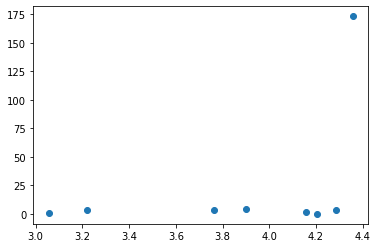

In [191]:
# Scatter Plot of travel time in ms over the distance from home
plt.scatter(np.log10(time_travel_[key][time_travel_[key] > 0]), dist_home_[key][time_travel_[key] > 0])

Compute Dataframe of Time spent over the distance from home

In [269]:
# Dictionary of the dictionary created, home distances is the same.
lst_dict = [dist_home_,n_taps_travel,time_travel_,n_taps_maps,time_maps_]
#lst_dict

In [270]:
final_dataset_time = pd.DataFrame(lst_dict).T.rename(columns ={0:'home_distance', 1:'maps_taps', 2:'maps_time', 3:'travel_taps',4:'travel_time'})
final_dataset_time

,home_distance,maps_taps,maps_time,travel_taps,travel_time
138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,"[0.7154266504643374, 0.7174354120249216, 2.002...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
138ede62aca0b4e54d5d8d8c8d2f2bbdb68b28eb,"[8.404665823220983, 8.299799896972898, 7.13942...","[13, 18, 0, 0, 0, 0, 0, 0, 34, 65, 10, 44, 16,...","[0, 475293, 0, 0, 0, 0, 0, 0, 270326, 174466, ...","[84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[270388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
138e0597ea9b57894f38aee74a16a0186c1528eb,"[0.002481810964628314, 0.0008965083520755992, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
138ee3feca7786b24eb2b35a70ff59962aaa28eb,"[0.008432116253324984, 0.007400439553379387, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0,...","[0, 0, 15816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84..."
138eca2a9c79641143409c8a1669caf43f0f28eb,"[0.024377139819700466, 0.004393883871264899, 3...","[29, 0, 162, 79, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,...","[0, 0, 503394, 631481, 0, 0, 0, 0, 0, 753, 753...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
138e950989d8c0a14c63ab70fb83ed691f2828eb,"[0.35525342657241116, 0.342312117276889, 0.264...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 975...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
138e16263a067d1a45c0a6c0a8e494e939f828eb,"[0.008126146969488992, 0.010776189104365355, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
138e78a79ad1ab1d4372845daa5a80f28b2028eb,"[1330.3165331457024, 1330.3160030754, 1330.316...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 18580, 18580, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
138ef6acc48b7b61469eb83bb5640cf9976b28eb,"[0.20469672324663463, 0.0002796694025527824, 0...","[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 4827, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3109, 0, ..."
138ef3426f347ae44abfbf73255ef7c6ce2a28eb,"[107.17962545173623, 107.1896925845386, 107.46...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [271]:
# Reset the index and rename that as participant
final_dataset_time =final_dataset_time.reset_index()
final_dataset_time.rename(columns={'index':'participant'})

,participant,home_distance,maps_taps,maps_time,travel_taps,travel_time
0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,"[0.7154266504643374, 0.7174354120249216, 2.002...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,138ede62aca0b4e54d5d8d8c8d2f2bbdb68b28eb,"[8.404665823220983, 8.299799896972898, 7.13942...","[13, 18, 0, 0, 0, 0, 0, 0, 34, 65, 10, 44, 16,...","[0, 475293, 0, 0, 0, 0, 0, 0, 270326, 174466, ...","[84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[270388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,138e0597ea9b57894f38aee74a16a0186c1528eb,"[0.002481810964628314, 0.0008965083520755992, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,138ee3feca7786b24eb2b35a70ff59962aaa28eb,"[0.008432116253324984, 0.007400439553379387, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0,...","[0, 0, 15816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84..."
4,138eca2a9c79641143409c8a1669caf43f0f28eb,"[0.024377139819700466, 0.004393883871264899, 3...","[29, 0, 162, 79, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,...","[0, 0, 503394, 631481, 0, 0, 0, 0, 0, 753, 753...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,138e950989d8c0a14c63ab70fb83ed691f2828eb,"[0.35525342657241116, 0.342312117276889, 0.264...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 975...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,138e16263a067d1a45c0a6c0a8e494e939f828eb,"[0.008126146969488992, 0.010776189104365355, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,138e78a79ad1ab1d4372845daa5a80f28b2028eb,"[1330.3165331457024, 1330.3160030754, 1330.316...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 18580, 18580, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,138ef6acc48b7b61469eb83bb5640cf9976b28eb,"[0.20469672324663463, 0.0002796694025527824, 0...","[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 4827, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3109, 0, ..."
9,138ef3426f347ae44abfbf73255ef7c6ce2a28eb,"[107.17962545173623, 107.1896925845386, 107.46...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#final_dataset_time

In [261]:
# write the dataset into a csv file
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/final_dataset_time.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
final_dataset_time.to_csv(filepath)

In [272]:
# Explode the dataset as a final one and write it to  csv. Exploded is needed for the later analysis.
exploded_time = final_dataset_time.apply(pd.Series.explode).reset_index()
#exploded.set_index('index')
exploded_time

,level_0,index,home_distance,maps_taps,maps_time,travel_taps,travel_time
0,0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,0.715427,0,0,0,0
1,0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,0.717435,0,0,0,0
2,0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,2.002269,0,0,0,0
3,0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,2.211021,0,0,0,0
4,0,138e7b030cfe4fa9453dba8ce5f19f1aa37928eb,2.002039,0,0,0,0
...,...,...,...,...,...,...,...
74299,37,138e946c7649b49a470899898a76e3c7728428eb,20.865765,0,0,0,0
74300,37,138e946c7649b49a470899898a76e3c7728428eb,20.865127,0,0,0,0
74301,37,138e946c7649b49a470899898a76e3c7728428eb,20.86183,0,0,0,0
74302,37,138e946c7649b49a470899898a76e3c7728428eb,20.862596,0,0,0,0


In [273]:
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/final_exploded_dataset_time.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
exploded_time.to_csv(filepath)
